# Lệnh kubectl tương tác với Cluster
 - cú pháp chính: kubectl [command] [TYPE] [NAME] [flags]
 - trong đó:
   - [command] là lệnh, hành động như apply, get, delete, describe ...
   - [TYPE] kiểu tài nguyên như ns, no, po, svc ...
   - [NAME] tên đối tượng lệnh tác động
   - [flags] các thiết lập, tùy thuộc loại lệnh

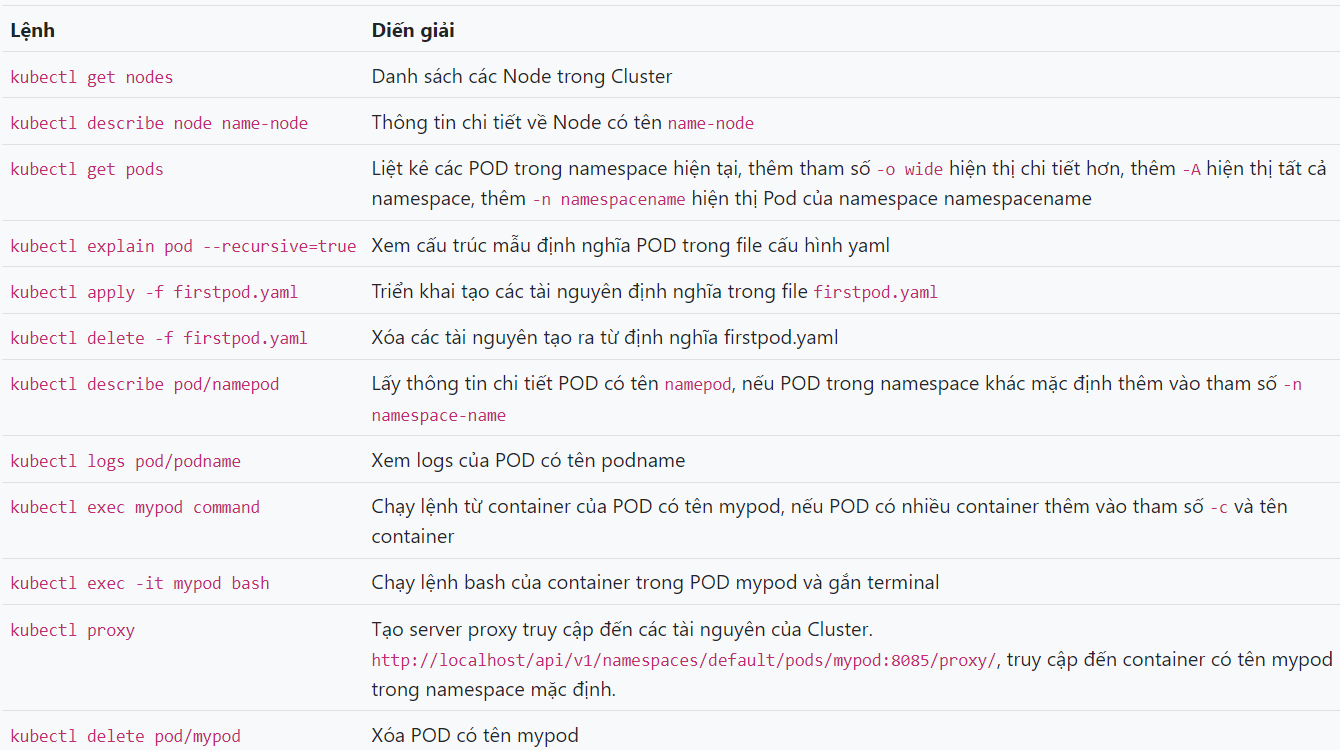

# Node

## Addresses
 - HostName: Hostname của node
 - InternalIP: địa chỉ IP của node sử dụng trong nội bộ Cluster
 - ExternalIP: địa chỉ IP của node có hiệu lực từ ngoài cluster liên lạc đến

## Conditions
Thông tin trạng thái đang chạy của node, có các thông tin

 - Ready: giá trị true - chấp nhận triển khai chạy các Pod
 - MemoryPressure: giá trị true nếu cạn kiệt bộ nhớ
 - DiskPressure: giá trị true nếu cạn kiệt đĩa lưu trữ
 - NetworkUnavailable: giá trị true nếu cấu hình mạng lỗi

## Capacity / Allocatable
Capacity cho biết tài nguyên có hiệu lực như CPU, bộ nhớ, số pod có thể chạy ... Allocatable

## System Info
Các thông tin phần mềm trên hệ thống

## Nhãn của Node


In [ ]:
# Thiết lập nhãn
!kubectl label node worker1.xtl tennhan=giatrinhan

In [ ]:
# Lấy các tài nguyên có nhãn nào đó
!kubectl get node -l "tennhan=giatrinhan"

In [ ]:
# Xóa nhãn
!kubectl label node worker1.xtl tennhan-

# Pod
Kubernetes không chạy các container một cách trực tiếp, thay vào đó nó bọc một hoặc vài container vào với nhau trong một cấu trúc gọi là POD. Các container cùng một pod thì chia sẻ với nhau tài nguyên và mạng cục bộ của pod.

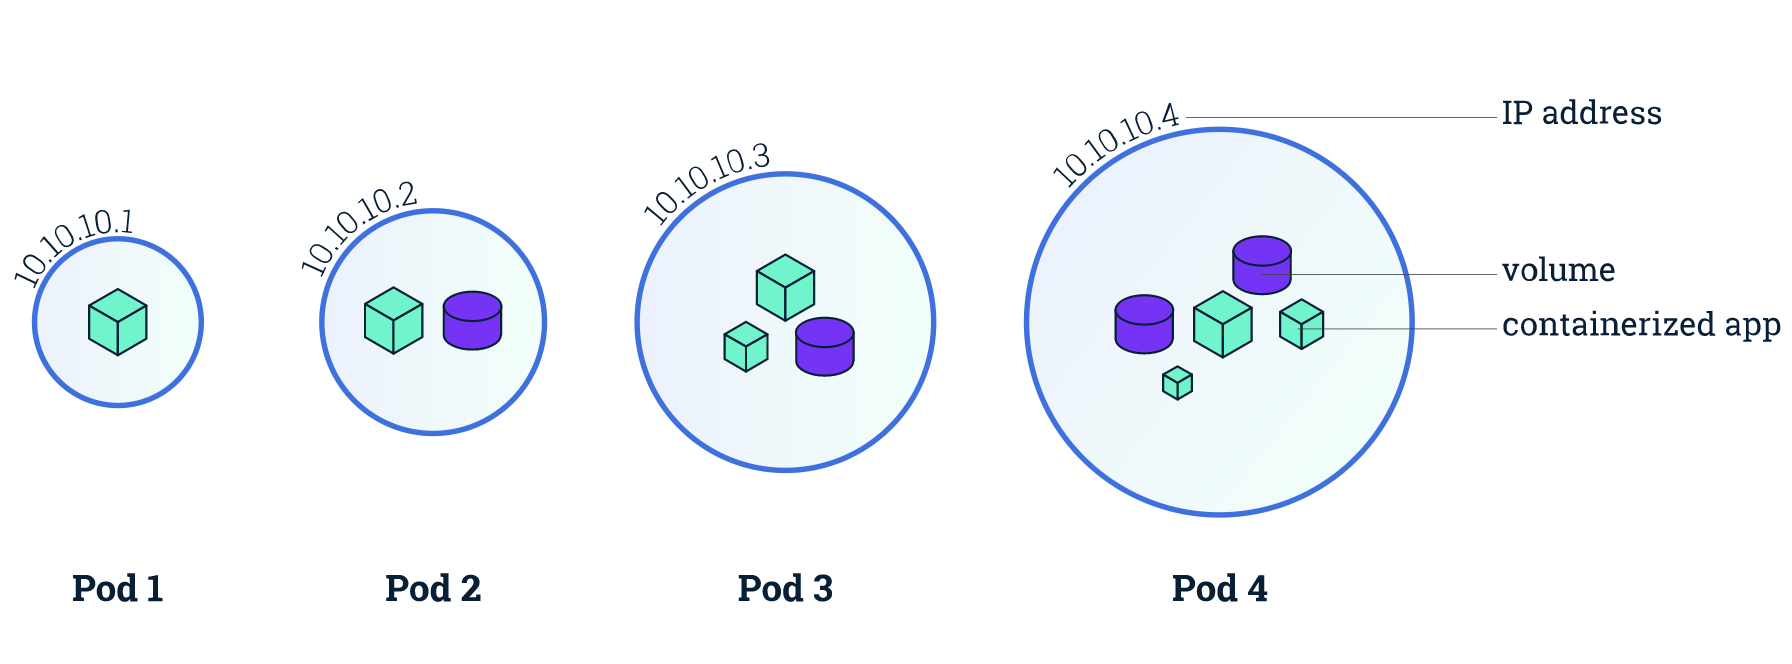

Pod là thành phần đơn vị (nhỏ nhất) để Kubernetes thực hiện việc nhân bản (replication), có nghĩa là khi cần thiết thì Kubernetes có thể cấu hình để triển khai nhân bản ra nhiều pod có chức năng giống nhau để tránh quá tải, thậm chí nó vẫn tạo ra nhiều bản copy của pod khi không quá tải nhằm phòng lỗi (ví dụ node bị die).

Pod có thể có nhiều container mà pod là đơn vị để scale (có nghĩa là tất cả các container trong pod cũng scale theo) nên nếu có thể thì cấu hình ứng dụng sao cho một Pod có ít container nhất càng tốt.
 - Cách sử dụng hiệu quả và thông dụng là dùng loại Pod trong nó chỉ chạy một container.
 - Pod loại chạy nhiều container trong đó thường là đóng gói một ứng dụng xây dựng với sự phối hợp chặt chẽ từ nhiều container trong một khu vực cách ly, chúng chia sẻ tài nguyên ổ đĩa, mạng cho nhau.

In [ ]:
# Triển khai tạo pod từ file
!kubectl apply -f firstpod.yaml

In [ ]:
# Mặc định Kubernetes không tạo và chạy POD ở Node Master để đảm bảo yêu cầu an toàn, nếu vẫn muốn chạy POD ở Master thi hành lệnh sau: 
!kubectl taint nodes --all node-role.kubernetes.io/master-

In [ ]:
# Liệt kê các pod ở namespace mặc định
!kubectl get pods

# Hiện thị nhiều thông tin hơn
!kubectl get pod -o wide

# Pod ở namepace: kubernetes-dashboard
!kubectl get pod -o wide -n kubernetes-dashboard

# Pod ở tất cả các namespace
!kubectl get pod -A

# Liệt kê các Pod có nhãn app: mypod
!kubectl get pod -l "app=mypod"

# Kiểm tra manifest
!kubectl get pod/nginx-swarmtest -o yaml

In [ ]:
# Xem thông tin chi tiết của Pod
!kubectl describe pod/namepod

In [ ]:
# Xem các sự kiện xảy ra trên cluster
!kubectl get ev

In [ ]:
# Tra cứu log của Pod
!kubectl logs pod/podname

# Thi hành một lệnh của Pod
!kubectl exec podname command [arg]
!kubectl exec mypod ls /

# Chạy tiến trình trong Pod và gắn vào terminal
!kubectl exec -it mypod bash

In [ ]:
# Truy cập Pod từ bên ngoài Cluster (Kiểm tra - Debug)
!kubectl proxy

!kubectl proxy --address="0.0.0.0" --accept-hosts='^*$'

In [ ]:
# Cổng host 8080 được chuyển hướng truy cập đến cổng 8085 của POD mypod
!kubectl port-forward mypod 8080:8085

In [ ]:
# Xóa Pod
!kubectl delete pod/mypod

!kubectl delete -f firstpod.yaml

## Pod có nhiều container

In [ ]:
!kubectl apply -f secondpod.yaml

# Ổ đĩa / Volume trong POD


In [ ]:
!kubectl apply -f thirdpod.yaml

In [1]:
# Nếu muốn sử dụng ổ đĩa - giống nhau về dữ liệu trên nhiều POD, 
# kể cả các POD đó chạy trên các máy khác nhau thì cần dùng
# các loại đĩa Remote - ví dụ NFS